In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
from scipy.stats import gaussian_kde


In [9]:
directory = "facebook100txt"


In [3]:
def calcModularity(A, x, numTypes):
    n = len(A)
    m = np.sum(np.sum(A))
    # calculate e matrix
    e = [[0 for i in range(numTypes)] for j in range(numTypes)]
    for i in range(n):
        for j in range(n):
            if A[i][j]:
                u = x[i]
                v = x[j]
                e[u][v] += 1
    e = e / m
    # calculate a array
    a = np.sum(e, axis=1)
    # calculate modularity Q
    Q = 0
    for u in range(numTypes):
        Q += (e[u][u] - a[u]*a[u])
    return Q
    
# testing with example from class
A = [[0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0],
     [1, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 1],
     [0, 0, 0, 1, 0, 1], [0, 0, 0, 1, 1, 0]]
x = [1,1,1,0,0,0]
calcModularity(A,x,2)

0.3571428571428571

In [39]:
directory = "facebook100txt"
i = 0
attribute = 1
modStatus = []
modMajor = []
modDegree = []
for filename in os.listdir(directory):
    if not filename.endswith("_attr.txt"):
        print(i)
        print(filename)
        i += 1
        node_list_status = []
        node_list_major = []
        with open(directory+"/"+filename.split(".txt")[0]+"_attr.txt", "r") as f:
            data = f.readline()
            data = f.readline()
            while data:
                vals = data.split("\n")[0].split("\t")
                node_list_status.append(int(vals[0]))
                node_list_major.append(int(vals[2]))
                data = f.readline()
        f.close()
        
        n = len(node_list_status)
        A = np.array([[0 for i in range(n)] for j in range(n)])
        with open(directory+"/"+filename, "r") as f:
            data = f.readline()
            while data:
                vals = data.split("\n")[0].split("\t")
                A[int(vals[0])-1][int(vals[1])-1] = 1
                data = f.readline()
        f.close()
        
        node_list_degree = np.sum(A, axis=1)
        
        modStatus.append(calcModularity(A,node_list_status,np.max(node_list_status)+1))
        modMajor.append(calcModularity(A,node_list_major,np.max(node_list_major)+1))
        modDegree.append(calcModularity(A,node_list_degree,np.max(node_list_degree)+1))

0
American75.txt
1
Amherst41.txt
2
Auburn71.txt
3
Baylor93.txt
4
BC17.txt
5
Berkeley13.txt
6
Bingham82.txt
7
Bowdoin47.txt
8
Brandeis99.txt
9
Brown11.txt
10
BU10.txt
11
Bucknell39.txt
12
Cal65.txt
13
Caltech36.txt
14
Carnegie49.txt
15
Colgate88.txt
16
Columbia2.txt
17
Cornell5.txt
18
Dartmouth6.txt
19
Duke14.txt
20
Emory27.txt
21
FSU53.txt
22
Georgetown15.txt
23
GWU54.txt
24
Hamilton46.txt
25
Harvard1.txt
26
Haverford76.txt
27
Howard90.txt
28
Indiana69.txt
29
JMU79.txt
30
Johns Hopkins55.txt
31
Lehigh96.txt
32
Maine59.txt
33
Maryland58.txt
34
Mich67.txt
35
Michigan23.txt
36
Middlebury45.txt
37
Mississippi66.txt
38
MIT8.txt
39
MSU24.txt
40
MU78.txt
41
Northeastern19.txt
42
Northwestern25.txt
43
Notre Dame57.txt
44
NYU9.txt
45
Oberlin44.txt
46
Oklahoma97.txt
47
Penn94.txt
48
Pepperdine86.txt
49
Princeton12.txt
50
Reed98.txt
51
Rice31.txt
52
Rochester38.txt
53
Rutgers89.txt
54
Santa74.txt
55
Simmons81.txt
56
Smith60.txt
57
Stanford3.txt
58
Swarthmore42.txt
59
Syracuse56.txt
60
Temple83.tx

In [40]:
print(len(modDegree))

100


In [7]:
modDegree = [0.0006580185316957717, -0.0005968916693676096, 0.0006735009606238858, 0.0005095213540467872, 0.0005804171271760959, 0.0007624157419548937, 0.000562631742417711, -0.0002953446904937505, 0.00014013624386830455, 0.0006294521945634708, 0.0007868995274308447, 0.0004925738587713326, 0.00079720869575703, -0.00038662712435670555, 0.0007298406732209861, 0.000339394931863352, 0.0006169609901447888, 0.0008865784927006951, 0.00022054025279343774, 0.00043286976462542526, 0.00011607149657136548, 0.0011283949676527756, 0.000404522504014476, 0.0007665380277035926, -0.0002781127015247098, 0.0007701869342959441, -0.0005882687623363415, -3.336201101802178e-05, 0.0008134998285327127, 0.0008214838974540934, 0.0005771122950205291, 0.00010710563981580164, 0.0005839602806678404, 0.0008552722224883262, 0.0010818130283873878, 0.0009870178649052127, 0.00028711249912663847, 0.0003994704100188521, 0.0005337592407289405, 0.0010158514940249957, 0.0008416163699176333, 0.0010514176873269011, 0.0005235728745508513, 0.000638774278015291, 0.0007408733977045608, 0.0008171267852405435, 0.0007423492563170117, 0.0011007909714101773, 0.00018631888436134242, 0.0006747764252075053, -0.0005427668781862039, -0.00013771338219225777, 0.0002228226756507899, 0.0008354797923805847, 8.68779386707523e-05, -0.00039422513272424165, -8.417108393983205e-05, 0.0006495614559491886, -0.00025206121913738644, 0.0008285405725228594, 0.001009058604202854, 0.0007595347793595812, 0.001048339640641965, 0.0007016823554379102, -7.748803635529039e-05, 0.0008712162552744624, 0.0006821775753296286, 0.000859532888657674, 0.0013730884526061522, 0.0011755715338828748, 0.0014550746970453676, 0.0006403485819735002, 0.0009956554584071504, 0.0008590540131910719, 0.0011206896899131963, 0.0010327101654574449, 0.0008990136094067884, 0.0009657593450797158, 0.000898493007475024, 0.0009228293088331862, 0.0007761425525891983, 0.0006430131206003773, 0.0007625288763731092, 0.0006466161526617927, 0.0015944502154904559, 0.0003054756729061447, 0.0006393030963032154, 0.0005517210828112769, 1.8353031059032677e-05, 0.0008770835507480894, 0.0005516501926841584, 0.001087488556513455, 0.0006965840309742263, 0.0005452429501570167, 0.0012039795108052466, 0.00036823269381919006, 0.00037353048704910136, 0.00036793755049682893, 0.0008951673739587857, 0.0005052351986585045]
print(modDegree)

[0.0006580185316957717, -0.0005968916693676096, 0.0006735009606238858, 0.0005095213540467872, 0.0005804171271760959, 0.0007624157419548937, 0.000562631742417711, -0.0002953446904937505, 0.00014013624386830455, 0.0006294521945634708, 0.0007868995274308447, 0.0004925738587713326, 0.00079720869575703, -0.00038662712435670555, 0.0007298406732209861, 0.000339394931863352, 0.0006169609901447888, 0.0008865784927006951, 0.00022054025279343774, 0.00043286976462542526, 0.00011607149657136548, 0.0011283949676527756, 0.000404522504014476, 0.0007665380277035926, -0.0002781127015247098, 0.0007701869342959441, -0.0005882687623363415, -3.336201101802178e-05, 0.0008134998285327127, 0.0008214838974540934, 0.0005771122950205291, 0.00010710563981580164, 0.0005839602806678404, 0.0008552722224883262, 0.0010818130283873878, 0.0009870178649052127, 0.00028711249912663847, 0.0003994704100188521, 0.0005337592407289405, 0.0010158514940249957, 0.0008416163699176333, 0.0010514176873269011, 0.0005235728745508513, 0.

In [6]:
modStatus = [0.07274335150097941, 0.13776078562920743, 0.042105382955651, 0.08139491199472992, 0.18572449122500406, 0.07618645198650166, 0.07907640748212179, 0.12390995570433276, 0.11940054178002882, 0.166697306341606, 0.1173700152210711, 0.11877429919869917, 0.02921252479788228, 0.07771774908563947, 0.10528283332955092, 0.14079862998649798, 0.15543958762296645, 0.15750137086828173, 0.18062293918204853, 0.17227597818794368, 0.1155504922846961, 0.054695099373299326, 0.20887066257790454, 0.105995827719185, 0.1002551168314473, 0.27109014226551, 0.09611667761518927, 0.04986427190424705, 0.07009786533970214, 0.0621743825268777, 0.09695158827842519, 0.07826911390964461, 0.03190055579705001, 0.060202525826518694, 0.05496239882499932, 0.10773482679861295, 0.13993956926044238, 0.05871414859142083, 0.12432847079055746, 0.0623195159059255, 0.06613287229329573, 0.0471532737471269, 0.11388036984980601, 0.1559343174893002, 0.09446502665775464, 0.06874899669325825, 0.04334891479572589, 0.054265036351251884, 0.09533154000656244, 0.18522484025360822, 0.06868023169281033, 0.1302337580431372, 0.07490692505784471, 0.0602343170903813, 0.06765270379033955, 0.05846948982216036, 0.08875154794704408, 0.14935915105274794, 0.11533673946450351, 0.10898576351434552, 0.025801737900327793, 0.05098905996209632, 0.07014585294749436, 0.05219524383254496, 0.11561341994375449, 0.15796863986190982, 0.12465997828351078, 0.036039601483609254, 0.04321538760238065, 0.019930138433831714, 0.017054483988112927, 0.13496037855734375, 0.060153586874778266, 0.056889846338065986, 0.05744884834941468, 0.032770612315543415, 0.0433824459255895, 0.0777065024913649, 0.0800666437916098, 0.059403218320012156, 0.0605506853979198, 0.08452082637223854, 0.1659461473284294, 0.07996035065748609, 0.013062507870246832, 0.02904987545486588, 0.14105130202115182, 0.1304742900400456, 0.12821848031354555, 0.06383148744752135, 0.11770894436625505, 0.06118538175540586, 0.09847839102723392, 0.13080385179171633, 0.14983185089017956, 0.12453358913438958, 0.0947608253752976, 0.16339575089124073, 0.06312390355513002, 0.1827615843455888]
print(modStatus)

[0.07274335150097941, 0.13776078562920743, 0.042105382955651, 0.08139491199472992, 0.18572449122500406, 0.07618645198650166, 0.07907640748212179, 0.12390995570433276, 0.11940054178002882, 0.166697306341606, 0.1173700152210711, 0.11877429919869917, 0.02921252479788228, 0.07771774908563947, 0.10528283332955092, 0.14079862998649798, 0.15543958762296645, 0.15750137086828173, 0.18062293918204853, 0.17227597818794368, 0.1155504922846961, 0.054695099373299326, 0.20887066257790454, 0.105995827719185, 0.1002551168314473, 0.27109014226551, 0.09611667761518927, 0.04986427190424705, 0.07009786533970214, 0.0621743825268777, 0.09695158827842519, 0.07826911390964461, 0.03190055579705001, 0.060202525826518694, 0.05496239882499932, 0.10773482679861295, 0.13993956926044238, 0.05871414859142083, 0.12432847079055746, 0.0623195159059255, 0.06613287229329573, 0.0471532737471269, 0.11388036984980601, 0.1559343174893002, 0.09446502665775464, 0.06874899669325825, 0.04334891479572589, 0.054265036351251884, 0.09

In [5]:
modMajor = [0.04240265113720037, 0.038427490597598465, 0.03878367197161585, 0.04298606370777532, 0.037538853597867065, 0.055770955408260575, 0.044275165039766896, 0.048156909082620186, 0.03720453717111827, 0.03727197378900678, 0.06571969598727634, 0.047873004915053516, 0.10031575788445486, 0.03208116414966674, 0.12483448299239398, 0.048266765255937115, 0.04058380384136568, 0.0842183377894193, 0.0363963482818266, 0.03931397650727508, 0.03221918100507395, 0.04175641095388478, 0.03887069007165654, 0.04019166072417908, 0.03509964300970266, 0.04661482873776048, 0.03188978509626654, 0.041022365317401555, 0.04220228778776277, 0.05109597699640305, 0.06019107606577387, 0.04050272848892575, 0.05629231859393523, 0.04946439456116342, 0.06899227184894217, 0.05687380765904152, 0.041712357047206154, 0.03745698811456244, 0.05282655952629084, 0.03855341618418932, 0.045125700200819255, 0.09426934024269584, 0.07868616707582576, 0.04479724085268947, 0.10148246141025916, 0.0884963273468661, 0.03556684796968711, 0.048018915483911316, 0.03259137742173948, 0.05065464992033439, 0.039870674259837216, 0.045853600777810796, 0.06082040278460306, 0.05639784760421812, 0.0422419681391699, 0.05796462041548549, 0.04751771732560981, 0.04600481012372605, 0.03694316764832736, 0.06866124960858462, 0.05512019684017192, 0.03617643207523533, 0.05810687842386549, 0.05075222640605391, 0.061880806537991453, 0.03910365436718675, 0.04409920222202509, 0.03400751607307176, 0.052795679448761894, 0.03610875388134214, 0.0302603891056388, 0.04428511550134539, 0.043605159958404284, 0.044401217831252705, 0.03785624051055591, 0.04529075353531193, 0.03088389316131767, 0.04317753074789796, 0.031230132114374514, 0.048861915367280184, 0.06336875699269387, 0.04344743218519662, 0.048129308419554116, 0.07528071156768026, 0.02741032319885477, 0.0606035943616699, 0.048148841848135435, 0.04720960285354251, 0.05113491929906469, 0.04587402381044045, 0.04774409850164355, 0.04933738542184705, 0.03631950355825283, 0.037195199849154814, 0.03494286877557884, 0.046624377961249304, 0.03788131897852217, 0.035663301526824634, 0.03541042747373244, 0.04436328254502439]
print(modMajor)

[0.04240265113720037, 0.038427490597598465, 0.03878367197161585, 0.04298606370777532, 0.037538853597867065, 0.055770955408260575, 0.044275165039766896, 0.048156909082620186, 0.03720453717111827, 0.03727197378900678, 0.06571969598727634, 0.047873004915053516, 0.10031575788445486, 0.03208116414966674, 0.12483448299239398, 0.048266765255937115, 0.04058380384136568, 0.0842183377894193, 0.0363963482818266, 0.03931397650727508, 0.03221918100507395, 0.04175641095388478, 0.03887069007165654, 0.04019166072417908, 0.03509964300970266, 0.04661482873776048, 0.03188978509626654, 0.041022365317401555, 0.04220228778776277, 0.05109597699640305, 0.06019107606577387, 0.04050272848892575, 0.05629231859393523, 0.04946439456116342, 0.06899227184894217, 0.05687380765904152, 0.041712357047206154, 0.03745698811456244, 0.05282655952629084, 0.03855341618418932, 0.045125700200819255, 0.09426934024269584, 0.07868616707582576, 0.04479724085268947, 0.10148246141025916, 0.0884963273468661, 0.03556684796968711, 0.048

In [11]:
networkSize = []
i = 0
for filename in os.listdir(directory):
    if not filename.endswith("_attr.txt"):
        print(i)
        print(filename)
        i += 1
        with open(directory+"/"+filename.split(".txt")[0]+"_attr.txt", "r") as f:
            data = f.readline()
            data = f.readline()
            n = 1
            while data:
                n += 1
                data = f.readline()
        f.close()
        
        networkSize.append(n)

0
American75.txt
1
Amherst41.txt
2
Auburn71.txt
3
Baylor93.txt
4
BC17.txt
5
Berkeley13.txt
6
Bingham82.txt
7
Bowdoin47.txt
8
Brandeis99.txt
9
Brown11.txt
10
BU10.txt
11
Bucknell39.txt
12
Cal65.txt
13
Caltech36.txt
14
Carnegie49.txt
15
Colgate88.txt
16
Columbia2.txt
17
Cornell5.txt
18
Dartmouth6.txt
19
Duke14.txt
20
Emory27.txt
21
FSU53.txt
22
Georgetown15.txt
23
GWU54.txt
24
Hamilton46.txt
25
Harvard1.txt
26
Haverford76.txt
27
Howard90.txt
28
Indiana69.txt
29
JMU79.txt
30
Johns Hopkins55.txt
31
Lehigh96.txt
32
Maine59.txt
33
Maryland58.txt
34
Mich67.txt
35
Michigan23.txt
36
Middlebury45.txt
37
Mississippi66.txt
38
MIT8.txt
39
MSU24.txt
40
MU78.txt
41
Northeastern19.txt
42
Northwestern25.txt
43
Notre Dame57.txt
44
NYU9.txt
45
Oberlin44.txt
46
Oklahoma97.txt
47
Penn94.txt
48
Pepperdine86.txt
49
Princeton12.txt
50
Reed98.txt
51
Rice31.txt
52
Rochester38.txt
53
Rutgers89.txt
54
Santa74.txt
55
Simmons81.txt
56
Smith60.txt
57
Stanford3.txt
58
Swarthmore42.txt
59
Syracuse56.txt
60
Temple83.tx

In [12]:
print(networkSize)

[6387, 2236, 18449, 12804, 11510, 22938, 10005, 2253, 3899, 8601, 19701, 3827, 11248, 770, 6638, 3483, 11771, 18661, 7695, 9896, 7461, 27738, 9415, 12194, 2315, 15127, 1447, 4048, 29748, 14071, 5181, 5076, 9070, 20872, 3749, 30148, 3076, 10522, 6441, 32376, 15437, 13883, 10568, 12156, 21680, 2921, 17426, 41555, 3446, 6597, 963, 4088, 4564, 24581, 3579, 1519, 2971, 11622, 1660, 13654, 13687, 16980, 31561, 36372, 2614, 6683, 7753, 16809, 13747, 6834, 14941, 6592, 20468, 17213, 14936, 8992, 14949, 35124, 24390, 30810, 16517, 18164, 14917, 17445, 13378, 2683, 17197, 8070, 3069, 7325, 7773, 21326, 5373, 7756, 2971, 3594, 6473, 2791, 23843, 8579]


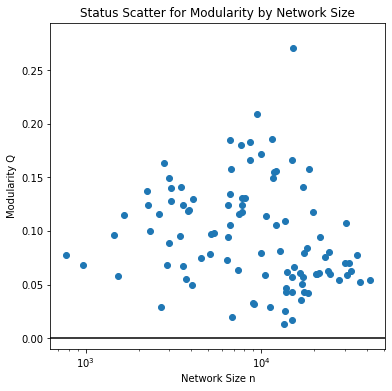

In [70]:
# scatter status
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(networkSize, modStatus)
ax.set_ylabel("Modularity Q")
ax.set_xlabel("Network Size n")
ax.set_title("Status Scatter for Modularity by Network Size")
ax.set_xscale("log")
ax.axhline(0, color="k")
plt.show()

In [51]:
modGender = []
i = 0
for filename in os.listdir(directory):
    if not filename.endswith("_attr.txt"):
        print(i)
        print(filename)
        i += 1
        node_list_gender = []
        with open(directory+"/"+filename.split(".txt")[0]+"_attr.txt", "r") as f:
            data = f.readline()
            data = f.readline()
            while data:
                vals = data.split("\n")[0].split("\t")
                node_list_gender.append(int(vals[1]))
                data = f.readline()
        f.close()
        
        n = len(node_list_gender)
        A = np.array([[0 for i in range(n)] for j in range(n)])
        with open(directory+"/"+filename, "r") as f:
            data = f.readline()
            while data:
                vals = data.split("\n")[0].split("\t")
                A[int(vals[0])-1][int(vals[1])-1] = 1
                data = f.readline()
        f.close()
                
        modGender.append(calcModularity(A,node_list_gender,np.max(node_list_gender)+1))

0
American75.txt
1
Amherst41.txt
2
Auburn71.txt
3
Baylor93.txt
4
BC17.txt
5
Berkeley13.txt
6
Bingham82.txt
7
Bowdoin47.txt
8
Brandeis99.txt
9
Brown11.txt
10
BU10.txt
11
Bucknell39.txt
12
Cal65.txt
13
Caltech36.txt
14
Carnegie49.txt
15
Colgate88.txt
16
Columbia2.txt
17
Cornell5.txt
18
Dartmouth6.txt
19
Duke14.txt
20
Emory27.txt
21
FSU53.txt
22
Georgetown15.txt
23
GWU54.txt
24
Hamilton46.txt
25
Harvard1.txt
26
Haverford76.txt
27
Howard90.txt
28
Indiana69.txt
29
JMU79.txt
30
Johns Hopkins55.txt
31
Lehigh96.txt
32
Maine59.txt
33
Maryland58.txt
34
Mich67.txt
35
Michigan23.txt
36
Middlebury45.txt
37
Mississippi66.txt
38
MIT8.txt
39
MSU24.txt
40
MU78.txt
41
Northeastern19.txt
42
Northwestern25.txt
43
Notre Dame57.txt
44
NYU9.txt
45
Oberlin44.txt
46
Oklahoma97.txt
47
Penn94.txt
48
Pepperdine86.txt
49
Princeton12.txt
50
Reed98.txt
51
Rice31.txt
52
Rochester38.txt
53
Rutgers89.txt
54
Santa74.txt
55
Simmons81.txt
56
Smith60.txt
57
Stanford3.txt
58
Swarthmore42.txt
59
Syracuse56.txt
60
Temple83.tx

In [ ]:
#import matplotlib.mlab as mlab

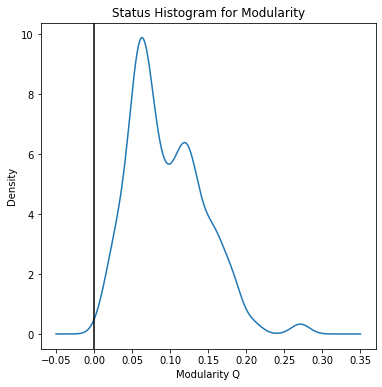

In [71]:
#histogram status
density = gaussian_kde(modStatus)
xs = np.linspace(-0.05,0.35,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(xs,density(xs))
#ax.hist(modStatus,100)
ax.set_ylabel("Density")
ax.set_xlabel("Modularity Q")
ax.set_title("Status Histogram for Modularity")
ax.axvline(0, color="k")

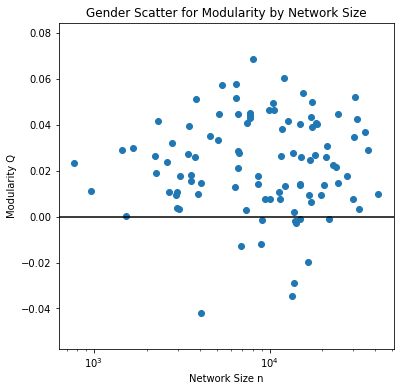

In [73]:
# scatter gender
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(networkSize, modGender)
ax.set_ylabel("Modularity Q")
ax.set_xlabel("Network Size n")
ax.set_title("Gender Scatter for Modularity by Network Size")
ax.set_xscale("log")
ax.axhline(0, color="k")
plt.show()
#for (txt, i) in labels:
#    ax.annotate(txt, (network[i], modStatus[i]),horizontalalignment='right')

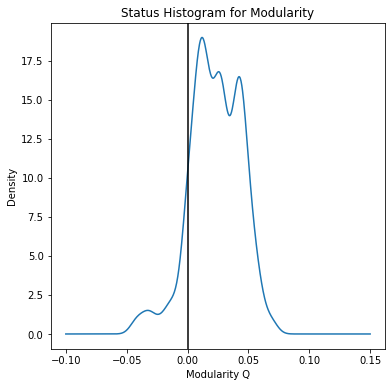

In [83]:
# histo gender
density = gaussian_kde(modGender)
xs = np.linspace(-0.1,0.15,800)
density.covariance_factor = lambda : .25
density._compute_covariance()
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(xs,density(xs))
#ax.hist(modStatus,100)
ax.set_ylabel("Density")
ax.set_xlabel("Modularity Q")
ax.set_title("Status Histogram for Modularity")
ax.axvline(0, color="k")

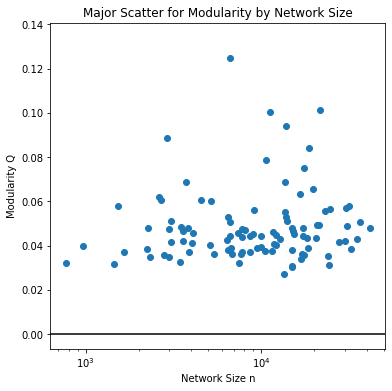

In [74]:
# scatter major
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(networkSize, modMajor)
ax.set_ylabel("Modularity Q")
ax.set_xlabel("Network Size n")
ax.set_title("Major Scatter for Modularity by Network Size")
ax.set_xscale("log")
ax.axhline(0, color="k")
#for (txt, i) in labels:
#    ax.annotate(txt, (network[i], modStatus[i]),horizontalalignment='right')

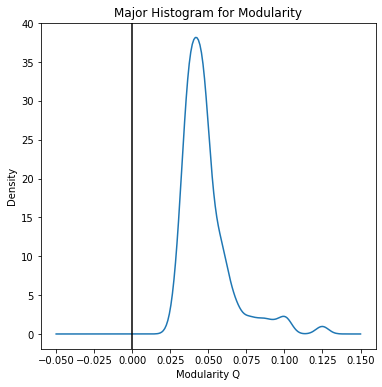

In [75]:
# histo major
density = gaussian_kde(modMajor)
xs = np.linspace(-0.05,0.15,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(xs,density(xs))
#ax.hist(modMajor,100)
ax.set_ylabel("Density")
ax.set_xlabel("Modularity Q")
ax.set_title("Major Histogram for Modularity")
ax.axvline(0, color="k")

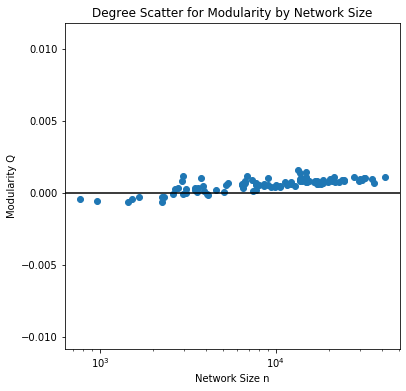

In [76]:
# scatter degree
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(networkSize, modDegree)
ax.set_ylabel("Modularity Q")
ax.set_xlabel("Network Size n")
ax.set_title("Degree Scatter for Modularity by Network Size")
ax.set_xscale("log")
ax.axhline(0, color="k")
#for (txt, i) in labels:
#    ax.annotate(txt, (network[i], modStatus[i]),horizontalalignment='right')

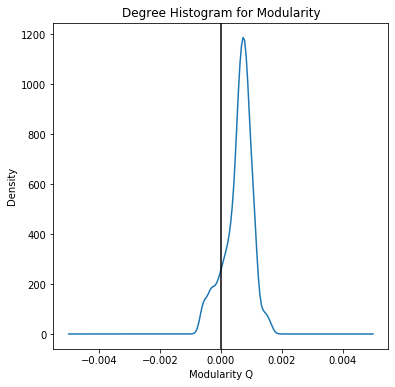

In [77]:
# histo degree
density = gaussian_kde(modDegree)
xs = np.linspace(-0.005,0.005,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(xs,density(xs))
#ax.hist(modDegree,100)
ax.set_ylabel("Density")
ax.set_xlabel("Modularity Q")
ax.set_title("Degree Histogram for Modularity")
ax.axvline(0, color="k")

In [78]:
print(modGender)

[0.013114890843283438, 0.026572986513059754, 0.04093498128172644, 0.04165691311632359, 0.007564078104057175, 0.022652731589543493, 0.00788455903918613, 0.0192301787294624, 0.00991557152178298, 0.014443967661353752, 0.009400382480524137, 0.05118283759275536, 0.010610144779798275, 0.023378202323262036, 0.044765237202632, 0.03951208783813802, 0.03830969810895154, 0.0405744578802465, 0.04434816268226058, 0.046312614321992684, 0.04064265364935099, 0.01787573084995781, 0.007486838469344721, 0.013434020088946685, 0.04167830050464062, 0.026177336788328415, 0.029047365797515462, -0.04202141432478644, 0.007609084777588174, -0.002867978071057626, 0.04462733929364357, 0.03340915372425404, -0.001593651073021334, 0.026048771015221597, 0.02619429787752635, 0.03459570050528096, 0.017913982017925354, 0.04970701197221385, 0.057614710122792956, 0.0033286642340009036, 0.05372013918037141, -0.0020385264197553352, 0.046623312930136704, 0.06032116996944925, -0.0008716469870027189, 0.009519448499459498, 0.049

In [ ]:
#problem 3

In [ ]:
#read karate club data


In [ ]:
#agglomeration algo
def greedyAgglomeration(A, groups, m):
    if not groups:
        groups = []
        for i in range(len(A)):
            groups.append([i])
    elif len(groups) == 1:
        return []
    print(groups)
    maxDeltaQ = -math.infty
    indices = (-1,-1)
    for i in range(len(groups)):
        for j in range(i+1,len(groups)):
            e = 0
            av = 0
            for v in groups[i]:
                av += np.sum(A[v])
                au = 0
                for u in groups[j]:
                    e += A[v][u]
                    au = np.sum(A[u])
            e /= m
            deltaQ = 2*(e - av*au)
            if maxDeltaQ < deltaQ:
                maxDeltaQ = deltaQ
                indices = (i, j)
    groups[i].extend(groups[j])
    groups.pop(j)
    return [maxDeltaQ].extend(greedyAgglomeration(A, groups, m))

A = [[0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0],
     [1, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 1],
     [0, 0, 0, 1, 0, 1], [0, 0, 0, 1, 1, 0]]
m = np.sum(A)/2
greedyAgglomeration(A,None,m)

In [ ]:
# line plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(networkSize, modDegree)
ax.set_ylabel("Modularity Q")
ax.set_xlabel("Number of Merges")
ax.set_title("Modularity while Merging")